In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pushkarasharma/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv("data.csv")
df.shape

(60000, 7)

In [4]:
df.head()

,Unnamed: 0,Id,Title,Body,Tags,CreationDate,Y
0,0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [5]:
df = df.drop(['Id','Tags','CreationDate','Unnamed: 0'],axis=1)
df.head()

,Title,Body,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,HQ
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,HQ
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",HQ
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,HQ


In [7]:
#Number Of words in Selected Text
df['Num_words_body'] = df['Body'].apply(lambda x:len(str(x).split()))
#Number Of words in main text
df['Num_words_title'] = df['Title'].apply(lambda x:len(str(x).split())) 
#Total  Number of words text and Selected Text
df['Total_words'] = abs(df['Num_words_body'] + df['Num_words_title']) 

df.head()

,Title,Body,Y,Num_words_body,Num_words_title,Total_words
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE,54,6,60
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,HQ,18,5,23
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,HQ,400,8,408
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",HQ,108,8,116
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,HQ,30,5,35


(0.0, 300.0)

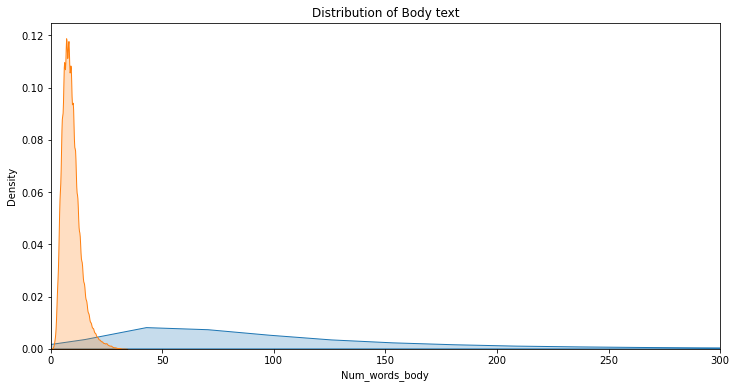

In [8]:
plt.figure(figsize=(12,6))
p = sns.kdeplot(df['Num_words_body'],shade=True).set_title('Distribution of Body text')
p = sns.kdeplot(df['Num_words_title'],shade=True).set_title('Distribution of Body text')
plt.xlim(0,300)


(-20.0, 500.0)

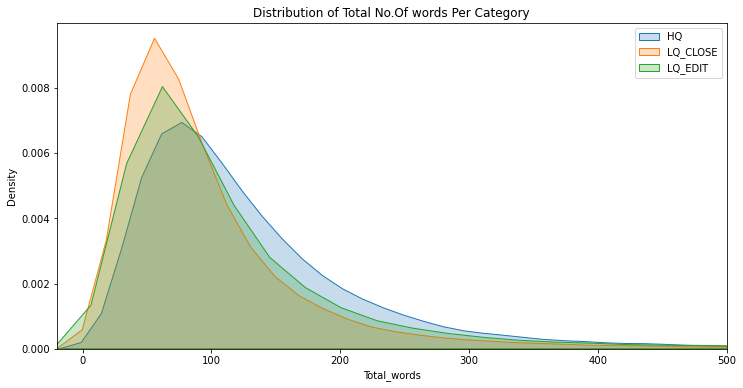

In [9]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df[df['Y']=='HQ']['Total_words'], shade=True,).set_title('Distribution of Total No.Of words Per Category')
p2=sns.kdeplot(df[df['Y']=='LQ_CLOSE']['Total_words'], shade=True)
p2=sns.kdeplot(df[df['Y']=='LQ_EDIT']['Total_words'], shade=True)
plt.legend(labels=['HQ','LQ_CLOSE','LQ_EDIT'])
plt.xlim(-20,500)


In [10]:
df['Y'] = df['Y'].map({'LQ_CLOSE':0,'LQ_EDIT':1,'HQ':2})
df.head()

,Title,Body,Y,Num_words_body,Num_words_title,Total_words
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,0,54,6,60
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,2,18,5,23
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,2,400,8,408
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",2,108,8,116
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,2,30,5,35


In [11]:
df.isnull().sum()

Title              0
Body               0
Y                  0
Num_words_body     0
Num_words_title    0
Total_words        0
dtype: int64

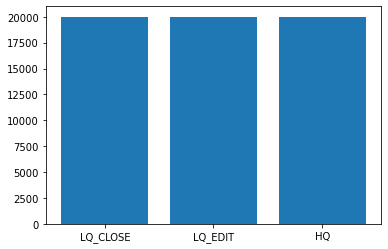

In [12]:
values = [len(df[df['Y']==0]),len(df[df['Y']==1]),len(df[df['Y']==2])]
plt.bar(['LQ_CLOSE','LQ_EDIT','HQ'],values)
plt.show()

In [13]:
df['All_text'] = df['Title']+' '+df['Body']
new_df = df.copy()
new_df = new_df.drop(['Title','Body'],axis=1)
new_df.head()

,Y,Num_words_body,Num_words_title,Total_words,All_text
0,0,54,6,60,Java: Repeat Task Every Random Seconds <p>I'm ...
1,2,18,5,23,Why are Java Optionals immutable? <p>I'd like ...
2,2,400,8,408,Text Overlay Image with Darkened Opacity React...
3,2,108,8,116,Why ternary operator in swift is so picky? <p>...
4,2,30,5,35,hide/show fab with scale animation <p>I'm usin...


In [14]:
#Cleaning the data

In [18]:
stop_words = stopwords.words('english')

def data_cleaning(data):
    data = data.lower()
    data = re.sub(r'[^(a-zA-Z)\s]','',data)
    data = data.split()
    temp = []
    for i in data:
        if i not in stop_words:
            temp.append(i)
    data = ' '.join(temp)
    return data

In [19]:
new_df['All_text'] = new_df['All_text'].apply(data_cleaning)
new_df['All_text']

0        java repeat task every random seconds pim alre...
1        java optionals immutable pid like understand j...
2        text overlay image darkened opacity react nati...
3        ternary operator swift picky pthe question sim...
4        hideshow fab scale animation pim using custom ...
                               ...                        
59995    align two flex boxes follow pi menu id like di...
59996    c correct way multiply integer double pi try m...
59997    django showing error try open new page hyperli...
59998    php getting content php page pi controller ins...
59999    cant overloaded functions vary return type pso...
Name: All_text, Length: 60000, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_df['All_text'],new_df['Y'],test_size=0.20)

In [25]:
print("X_train Size : ",x_train.size," Y_train Size : ",y_train.size)
print("X_test Size : ",x_test.size," Y_test Size : ",y_test.size) 

X_train Size :  48000  Y_train Size :  48000
X_test Size :  12000  Y_test Size :  12000


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)

In [29]:
print(x_train)

  (0, 276991)	0.23851225803210904
  (0, 124982)	0.1214183332624102
  (0, 318892)	0.08146397476588714
  (0, 72447)	0.08980562405982534
  (0, 77678)	0.06619035856912098
  (0, 293038)	0.11263272544775571
  (0, 342077)	0.17360100293727035
  (0, 68502)	0.09962829594887757
  (0, 72369)	0.07239654497751886
  (0, 342123)	0.10416865410361463
  (0, 39048)	0.3368845982475189
  (0, 1185)	0.12833401167651498
  (0, 113007)	0.09742752580666972
  (0, 334048)	0.08723345247390528
  (0, 235605)	0.0696966385490706
  (0, 127288)	0.06124546035267657
  (0, 338894)	0.09894229157888365
  (0, 346420)	0.15297939821898
  (0, 107660)	0.32597420573463437
  (0, 73751)	0.252044528589448
  (0, 255709)	0.2086860564680863
  (0, 102957)	0.12032873048729217
  (0, 108450)	0.17737731352169872
  (0, 254778)	0.5850608494737309
  (0, 117308)	0.22362543157356546
  :	:
  (47999, 170734)	0.10396292068381055
  (47999, 219539)	0.10769965364986998
  (47999, 110142)	0.07442808604559818
  (47999, 22830)	0.21509015511172383
  (47999, 1

In [31]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 76 kB/s  eta 0:00:01    |████▍                           | 21.6 MB 3.1 MB/s eta 0:00:45     |████████████▊                   | 62.5 MB 3.9 MB/s eta 0:00:25     |█████████████████▊              | 87.5 MB 3.9 MB/s eta 0:00:18     |██████████████████▏             | 89.3 MB 3.9 MB/s eta 0:00:18     |██████████████████████████▎     | 129.3 MB 2.5 MB/s eta 0:00:12     |███████████████████████████▎    | 134.2 MB 4.3 MB/s eta 0:00:06


In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

/home/pushkarasharma/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
predictions = xgb.predict(x_test)
acc = accuracy_score(predictions,y_test)
acc

0.8785

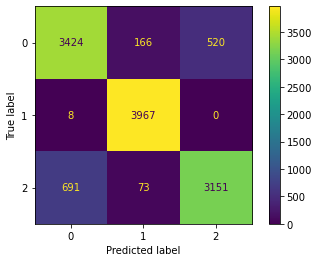

In [35]:
plot_confusion_matrix(xgb,x_test,y_test)